In [75]:
import pandas as pd
import sys

## Preprocesamiento y unión de la data

In [76]:
# Agregar directorio al path
sys.path.append('"C:\\Users\\delva\\OneDrive - Universidad de Antioquia\\SEMESTRE 2024-2\\Prueba_tecnica_HACEB"')

In [77]:
# Leer los archivos CSV con pandas
inventarios = pd.read_csv('Data/inventarios.csv', sep=';') 
print(inventarios.head())

ventas = pd.read_csv('Data/ventas.csv', sep=';') 
print(ventas.head())

   ID Producto  Bodega  Stock Actual  Costo Unitario
0          101  Centro            46            4000
1          102   Norte            54            5000
2          103     Sur            20            4500
3          104     Sur            54            5000
4          105  Centro            56            4000
   ID Producto Fecha de Venta  Cantidad Vendida  Bodega  \
0          107      1/08/2024                 5   Norte   
1          104      2/08/2024                16  Centro   
2          105      3/08/2024                16  Centro   
3          107      4/08/2024                21  Centro   
4          103      5/08/2024                14  Centro   

   Precio Unitario de venta  
0                      6000  
1                      8500  
2                      6000  
3                      5000  
4                      5000  


In [78]:
# merge con 'ID Producto' y 'Bodega'
df = pd.merge(ventas, inventarios, on=['ID Producto'], how='left')

# Visualizamos el DataFrame resultante
df

,ID Producto,Fecha de Venta,Cantidad Vendida,Bodega_x,Precio Unitario de venta,Bodega_y,Stock Actual,Costo Unitario
0,107,1/08/2024,5,Norte,6000,Sur,33,6000
1,104,2/08/2024,16,Centro,8500,Sur,54,5000
2,105,3/08/2024,16,Centro,6000,Centro,56,4000
3,107,4/08/2024,21,Centro,5000,Sur,33,6000
4,103,5/08/2024,14,Centro,5000,Sur,20,4500
5,108,6/08/2024,20,Centro,8500,Centro,22,5000
6,105,7/08/2024,19,Centro,5000,Centro,56,4000
7,105,8/08/2024,19,Centro,6500,Centro,56,4000
8,107,9/08/2024,23,Norte,5000,Sur,33,6000
9,102,10/08/2024,16,Sur,8000,Norte,54,5000


## Preguntas

Dado que un mismo producto está asociado a dos bodegas diferentes y no se cuenta con información adicional sobre esta situación, las preguntas se responderán bajo la premisa de que un producto puede estar almacenado en una bodega mientras que sus ventas pueden estar asociadas a otra.

Por lo tanto, se considerará que Bodega_x está directamente relacionada con la venta y Bogeda_y con el inventario

### Pregunta 1. ¿Cuáles son los 3 productos más vendidos en cada bodega en términos de cantidad?

En la bodega Centro, se vendieron un total de 189 unidades, destacando el producto 105 con 80 unidades, seguido del 103 con 70 unidades y el 108 con 39 unidades. 

La bodega Norte alcanzó 109 unidades vendidas, liderada por el producto 108 con 43 unidades, seguido por el 106 con 38 y el 107 con 28 unidades. 

Por otro lado, la bodega Sur tuvo un total de 56 unidades, siendo el producto 108 el más vendido con 22 unidades, seguido por el 103 con 18 y el 102 con 16.


In [79]:
# Filtrar por Bodega_x y sumar la cantidad vendida por cada producto
top_bodega = df.groupby(['Bodega_x', 'ID Producto'])['Cantidad Vendida'].sum().reset_index()

# Ordenar por Bodega_x y cantidad vendida en orden descendente
top_bodega = top_bodega.sort_values(['Bodega_x', 'Cantidad Vendida'], ascending=[True, False])

# Imprimir los primeros tres registros
top_bodega.groupby('Bodega_x').head(3)


,Bodega_x,ID Producto,Cantidad Vendida
3,Centro,105,80
1,Centro,103,70
5,Centro,108,39
11,Norte,108,43
9,Norte,106,38
10,Norte,107,28
16,Sur,108,22
13,Sur,103,18
12,Sur,102,16


### Pregunta 2. ¿Cuál es el valor monetario total del inventario actual en cada bodega?

El valor monetario total del inventario en la bodega Centro es de 518.000, en la bodega Norte es de 633.000 y en la bodega Sur es de 558.000

In [80]:
# Calcular el valor del inventario
inventarios['Valor Inventario'] = inventarios['Stock Actual'] * inventarios['Costo Unitario']


# Sumar los valores del inventario por cada bodega
inventarios.groupby('Bodega')['Valor Inventario'].sum().reset_index()

,Bodega,Valor Inventario
0,Centro,518000
1,Norte,633000
2,Sur,558000


### Pregunta 3. ¿Cuál es el día con mayor venta? (En unidades y monetariamente)

El 24/08/2024 es el día con mayor unidades vendidas y con mayor venta monetaria


In [81]:
# Calcular el total de ventas
df['Total Ventas'] = df['Cantidad Vendida'] * df['Precio Unitario de venta']

# Agrupar cantidad vendida y total de ventas por la fecha
ventas_diarias = df.groupby('Fecha de Venta').agg({'Cantidad Vendida': 'sum', 'Total Ventas': 'sum'}).reset_index()

# Obtener la fila con la mayor cantidad Vendida y el mayor cotal ventas
max_cantidad = ventas_diarias['Cantidad Vendida'].max()
max_total_ventas = ventas_diarias['Total Ventas'].max()

# Obtener la fila que cumpla ambas condiciones
resultado = ventas_diarias[
    (ventas_diarias['Cantidad Vendida'] == max_cantidad) &
    (ventas_diarias['Total Ventas'] == max_total_ventas)
]

print(resultado)


   Fecha de Venta  Cantidad Vendida  Total Ventas
16     24/08/2024                24        204000


### Pregunta 4. Mostrar en un solo gráfico el margen de ganancia de cada bodega. El margen de ganancia es la diferencia entre el valor total de ventas y el costo total correspondiente a los productos vendidos.

Los resultados obtenidos sugieren que la bodega con un mayor margen de ganancia es la bodega Centro con 770.500, seguida de la bodega Norte con 485.000. La bodega Sur, por su parte, dio un margen negativo de -531.500.


In [123]:
# Calcular el ingreso total de ventas por Bodega_x
df['Ingreso Total'] = df['Cantidad Vendida'] * df['Precio Unitario de venta']
ventas_por_bodega_x = df.groupby('Bodega_x')['Ingreso Total'].sum().reset_index()

# Calcular el costo total por Bodega_y
df['Costo Total'] = df['Cantidad Vendida'] * df['Costo Unitario']
costos_por_bodega_y = df.groupby('Bodega_y')['Costo Total'].sum().reset_index()

# Renombrar las columnas para hacer más claro que son diferentes
ventas_por_bodega_x.rename(columns={'Bodega_x': 'Bodega', 'Ingreso Total': 'Total Ventas'}, inplace=True)
costos_por_bodega_y.rename(columns={'Bodega_y': 'Bodega', 'Costo Total': 'Total Costos'}, inplace=True)

# Unir ambos DataFrames por bodega para obtener los márgenes solo donde coinciden las bodegas
margen_por_bodega = ventas_por_bodega_x.merge(costos_por_bodega_y, on='Bodega', how='inner')

# Calcular el margen por bodega
margen_por_bodega['Margen de ganancia'] = margen_por_bodega['Total Ventas'] - margen_por_bodega['Total Costos']

# Mostrar los resultados por bodega
margen_por_bodega

,Bodega,Total Ventas,Total Costos,Margen de ganancia
0,Centro,1682500,912000,770500
1,Norte,924500,439500,485000
2,Sur,465500,997000,-531500


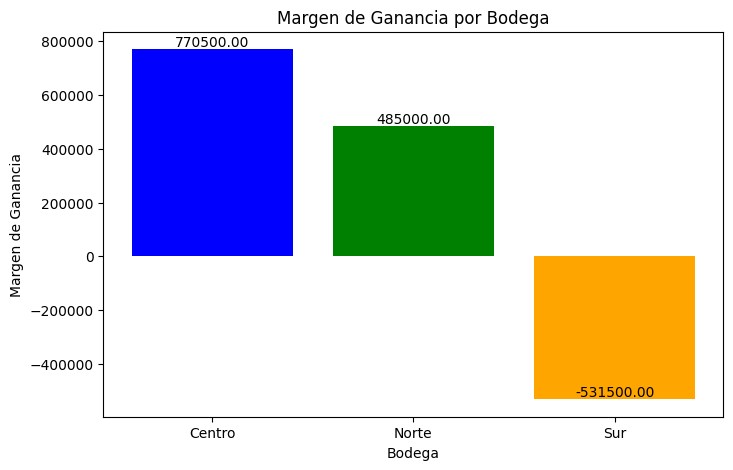

In [124]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras para el margen de ganancia por bodega
plt.figure(figsize=(8, 5))
plt.bar(margen_por_bodega['Bodega'], margen_por_bodega['Margen de ganancia'], color=['blue', 'green', 'orange'])

# Añadir etiquetas y título
plt.xlabel('Bodega')
plt.ylabel('Margen de Ganancia')
plt.title('Margen de Ganancia por Bodega')

# Mostrar los valores sobre cada barra
for index, value in enumerate(margen_por_bodega['Margen de ganancia']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

# Mostrar el gráfico
plt.show()
